# Diffraction for Circular Aperture

In [2]:
%matplotlib inline
%pylab inline
%load_ext autoreload
%autoreload 2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from scipy import ndimage
from matplotlib import rcParams
rcParams["font.size"] = "15"

Populating the interactive namespace from numpy and matplotlib


Then define the parameters for the diffraction experiment. All the symbols have their usual meaning (refer to chapter 4 section 4.4.2). 

In [118]:
r = .5e-07
z = 0.000003
waveLen = 500*10**-9
pixelSize = 6*10**-6 
N_pixels = 512

In [119]:
class circDiff(object):
    def __init__(self,r,z,waveLen,d_pix,N_pix):
        self.r = r
        self.z = z
        self.waveLen = waveLen
        self.k = 2*pi/waveLen
        self.N = N_pix
        
        # since we fix the pixel size and number of pixels at the detector plane (i.e. xy plane),
        self.d_x = d_pix #pixel size at the detector
        self.L_x = self.d_x*self.N #detector plane size 
        
        # once the detector size and its pixel size are fixed it relates to the illumination plane by the Fourier Transform
        # See equation 4-17 (Goodman, chapter4)
        # In the FT the conjugate variable of zee is (x/(lambda*z))
        # if N samples were taken then d(x/(lambda*z)) is 1/N*d_zee 
        # i.e. d_x = lambda*Z/N*d_zee 
        # i.e. d_zee = lambda*Z/N*d_x
        self.d_zee = self.waveLen*self.z/(self.N*self.d_x)
        self.L_zee = self.d_zee*self.N
        
        print self.d_zee
        print self.L_zee
        
        (self.zee,self.neeta) = self.make2Dplane(self.L_zee,self.N)
        (self.x,self.y) = self.make2Dplane(self.L_x,self.N)
        self.circAp = self.circ_aperture(self.zee,self.neeta,self.r)
            
    def make2Dplane(self,Lx,N):
        (x,y) = np.mgrid[-Lx/2:Lx/2:N*1j,-Lx/2:Lx/2:N*1j] 
        return (x,y)

    def circ_aperture(self,x,y,rad):
        return np.sqrt(x*x + y*y) < rad  
    
    def Fresnel(self):
        j = complex(0,1)
        tempVar = self.circAp * exp(j*self.k*(self.zee**2+self.neeta**2)/(2*self.z))
        U = exp(j*self.k*self.z + j*self.k*(self.x**2+self.y**2)/(2*self.z)) * fft.fftshift(np.fft.fft2(tempVar)) / (j*self.waveLen*self.z)
        I = abs(U)**2
        return I
    
    def Fraunhofer(self):
        j = complex(0,1)
        tempVar = self.circAp
        U = exp(j*self.k*self.z + j*self.k*(self.x**2+self.y**2)/(2*self.z)) * fft.fftshift(np.fft.fft2(tempVar)) / (j*self.waveLen*self.z)
        I = abs(U)**2
        return I

In [120]:
diffrationObject = circDiff(r,z,waveLen,pixelSize,N_pixels)
I_Fresnel = diffrationObject.Fresnel()
I_Fraunhofer = diffrationObject.Fraunhofer()

4.8828125e-10
2.5e-07


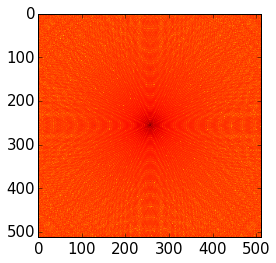

In [121]:
plt.imshow(np.log(I_Fraunhofer+exp(-30)))  

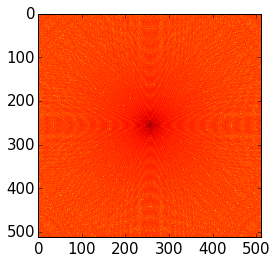

In [122]:
plt.imshow(np.log(I_Fresnel+exp(-30)))